<h1 style="text-align: center;">TF-IDF Assignment</h1>
<h2 style="text-align: center;">November 30, 2025</h2>
<h3 style="text-align: center;">Yucheng Bao</h3>

### Introduction
Becoming self-regulated benefits students in multiple ways during their learning process. Therein, the regulation of motivation has been identified as an essential component of self-regulated learning, as motivation is associated with academic persistence, effort-making, and performance (Zimmerman & Schunk, 2012). To understand the strategies students use in relation to their motivation, researchers have developed survey methods (Wolters, 1999; Schwinger et al., 2009). For instance, students may be asked to rate the likelihood or frequency of use of described strategies in hypothetical learning situations or through their retrospective learning reflections, using a Likert scale. However, researchers note that the use of closed-ended (Likert-scale, forced-choice) questions can lead to biased responses because it prevents respondents from describing the strategies they use freely (Zepeda & Nokes-Malach, 2021). Given this limitation, Mottett et al. (in prep) examine 146 students’ open-ended responses regarding their motivational experiences and manually categorize the motivational strategies mentioned in the responses using an inductive, qualitative thematic coding method. The results demonstrate that while students employed a variety of strategies covered in existing questionnaires, they also used strategies not included (e.g., motivating others and fear of failure), which reflects the advantage of qualitative approaches in capturing nuances in students’ thoughts and behaviors.<br>

A coin has two sides. Although qualitative coding provides rich insights into students’ motivational experiences, it requires extensive time and human resources, making it impractical for large databases with thousands of samples. In contrast, natural language processing (NLP) offers significant advantages, as it possesses the capability to analyze extensive textual datasets while uncovering intricate patterns efficiently (Gamieldien et al., 2023). Research has shown the utility of NLP approaches for conducting traditional thematic analysis using Topic Modeling methods such as Term Frequency–Inverse Document Frequency (TF-IDF) and Word2Vec. This study aims to extend the application of NLP to the education field, specifically in the learning setting of a large-scale digital learning platform designed for middle school math education (6-8th grades).<br>

This study aims to evaluate students' use of motivational strategies via an NLP approach: Most previous research on students' motivational regulation has focused on college student groups (Miele et al., in prep). This study extends the topic to the high school learning context, utilizing a qualitative inquiry approach, and serves as an early academic work, contributing evidence from other student groups. In addition, by comparing TF-IDF–based NLP outputs with human-coded themes, this study examines the extent to which automated analyses align with human qualitative judgments, offering insights into NLP's potential as a complementary tool for motivational research.

### Research Questions
**Research Question 1**: To what extent can a machine-learning model using the full TF-IDF feature matrix predict human-coded motivational strategies in students’ open-ended reflections?<br>
**Research Question 2**: Building up to the first question, to what extent can a machine-learning model using the top TF-IDF-derived predictive keywords (positive and negative) predict the same human-coded motivational strategies?

### Hypothese
**Hypothesis 1**: A machine-learning model trained on the full TF-IDF feature matrix will significantly predict the human-coded motivational strategies in students’ open-ended reflections.<br>
**Hypothesis 2**: A machine-learning model trained on the top TF-IDF–derived predictive keywords (positive and negative) will also predict the human-coded motivational strategies, although with lower accuracy than the full TF-IDF model.<br>
**Hypothesis 3**: TF-IDF-based NLP models will show above-chance ability to predict human-coded motivational regulation strategies. However, despite their predictive accuracy, the top TF-IDF features are unlikely to map neatly onto the conceptual definitions derived through human coding.


### Data
This study is part of a larger project involving 5404 middle school students (Grades 6-8) enrolled in MATHia, a digital Math Learning platform that serves as complementary instructional support. Due to the data privacy agreement and the scope of the research interests, the demographic information for the school districts, schools, teachers, and students involved in this study is not disclosed. Students followed teachers’ instructions to engage with instructional materials in MATHia. After the overall learning sessions, students were prompted to respond to an open-ended question: “_As you were working on this content, how did you motivate yourself? Please describe in as much detail as you can._”<br>

An open-ended question coding team comprised two research assistants (RAs) and the PIs. First, the two RAs read through a random sample of 30% of the total data and individually categorized student responses into different strategies following the coding protocol developed by Mottett et al. (in prep). Specifically, 0 indicates that the response does not reflect a particular motivational strategy, and 1 indicates that the response explicitly demonstrates or mentions one strategy. The two RAs then discussed and compared their categories, resolving any discrepancies that emerged. If an unlabeled motivational strategy repeatedly appeared during this initial review, the RAs consulted with the PIs to determine whether the pattern reflected a conceptually distinct theme. Together, the team engaged in iterative discussions to define, refine, and formalize this new category before proceeding with full dataset coding. From there, they developed a sample-adaptive protocol that included explanations of the strategies and example responses. The two RAs then coded another random sample used to develop the protocol (30% of the data). Using this refined protocol, the two RAs coded another random 30% sample. Once interrater reliability reached acceptable thresholds (Cohen’s κ > .70 and >90% agreement), the RAs independently coded the remaining responses.<br>

At the time of analysis, the whole coding process was still ongoing. Therefore, the present study focuses on a subsample of student responses (N = 764) that had already been fully coded according to the finalized coding protocol. Meanwhile, I conducted an additional manual inspection of the coded dataset to examine the frequency distribution of each motivational strategy. Based on this inspection, the current analysis focuses on the three most frequently observed codes: Willpower, Performance Self-Talk, and Effort, as these strategies appeared most frequently and provided a strong foundation for modeling students’ motivational patterns. A condensed coding protocol is provided below.

<img src="TF-IDF Assignment_files/images/Coding_Rubric.png" alt="Results for Performance Self-talk" width="800">

#### Data Cleaning and Preprocessing
All open-ended responses were processed using a multi-stage text-cleaning pipeline designed to remove noise, standardize linguistic structure, and prepare the data for subsequent natural language processing (NLP) analyses.
##### _Text Normalization_
We first standardized the raw text input to ensure uniform formatting across responses. All entries were converted to strings and converted to lowercase. Non-alphabetic characters, such as numbers, punctuation, and symbols, were removed by using regular expressions. Responses containing fewer than three characters were excluded at this stage, as they are more likely not to contain interpretable linguistic content.

In [ ]:
# Import Packages
import os
# Change to the working directory
os.chdir('/Users/zepedalab/Desktop/MATHia_NLP_YB')
import pandas as pd
import re
import spacy
!python3 -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

In [2]:
# Import Data File
text_df = pd.read_excel('/Users/zepedalab/Desktop/MATHia_NLP_YB/E1C3 Codes + partial E2C3.xlsx')

In [3]:
# Pre-process the text data (text_df)
# Convert the text input to the lower case string
# Remove all non-alphabetic characters
text_df['input'] = text_df['input'].astype(str)
text_df['input'] = text_df['input'].str.lower()
text_df['input'] = text_df['input'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
# Filter out any input that comprise less than 3 characters
text_df = text_df[text_df['input'].str.len() >= 3]
short_input_df = text_df[text_df['input'].str.len() < 3] #short_input_df allows us to manually check

##### _Nonsense String Detection and Removal_
During the initial manual review of students’ open-ended responses, we observed a substantial number of entries that were nonsensical or nonlinguistic (such as random characters, repeated letters, or strings lacking semantic content), which required further preprocessing. To address this issue, I implemented a two-step noise-removal procedure designed to identify and remove such unusable inputs. First, the nostril nonsense detector was applied to evaluate whether a text contains irregular or nonlinguistic character patterns (Hucka, 2018). All responses that were classified as nonsense were excluded. As the nostril nonsense detector requires a minimum string length of 6 characters for classification, some short strings cannot be evaluated. I then used a trained gibberish-detection model that imposes no length requirement on the remaining responses that had passed the nostril nonsense detector (Neuhaus & Ruvinskiy, 2015). Any input classified as gibberish was removed. While both tools have limitations and may not perfectly detect all forms of nonlinguistic input, using them in combination allowed us to remove the majority of uninterpretable responses and retain, to the greatest extent possible, linguistically meaningful texts suitable for subsequent NLP analysis.

In [4]:
# Detecting the nonsense string
from nostril import nonsense
short_indices = []
nonsense_indices = []

# Iterate through rows and separate nonsense rows
for index, row in text_df.iterrows():
    try:
        text = row['input']
        if len(text) < 6: # Check if the text is too short to test
            # Add the short text to short_text_df
            if len(text) < 6:
                short_indices.append(index)
            continue

        # Use nostril to detect nonsense in the current row's text
        if nonsense(text):
            nonsense_indices.append(index)

    except Exception as e:
        msg = str(e)
        if "Text is too short to test" in msg:
             short_indices.append(index)
        else:
            print(f"Error processing row {index}: {e}")

short_text_df = text_df.loc[short_indices]
nonsense_df = text_df.loc[nonsense_indices]
text_df = text_df.drop(nonsense_indices)

In [27]:
# Quicklook on the nonsense string
nonsense_df.input[:10]

4                                  jjjnnknjmimkkikiilkin
99                                           ummmmmm idk
103    jjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjj...
159                                              yayyyyy
162    dddddddddddddddddddddddddddddddddddddddddddddd...
263                            iiiiiiiiiiiiiiiiiiiiii kj
359                                           v guvghibj
463                                             ndcfksdj
480                                   ibhuiygutgcytuyvjh
505                                               jkkkkk
Name: input, dtype: object

In [6]:
# Pre-process those shor input by using the gibberish detector
from gibberish_detector import detector
Detector = detector.create_from_model('/Users/zepedalab/PycharmProjects/MATHia-NLP-YB/gibberish-detector.model')

In [7]:
gibberish_indices = []

# Iterate through rows and separate gibberish rows
for index, row in text_df.iterrows():
    try:
        # Check if the row is gibberish
        is_gibberish = Detector.is_gibberish(row['input'])

        # If it is gibberish, add to the gibberish_df and remove from text_df_3
        if is_gibberish:
            gibberish_indices.append(index)

    except Exception as e:
        print(f"Error processing row {index}: {e}")

gibberish_df = text_df.loc[gibberish_indices]
text_df = text_df.drop(gibberish_indices)

In [26]:
# Quicklook on the gibberish string
gibberish_df.input[:10]

93      bruhhhh
111    r gtktnq
113         idk
190         idk
191         idk
193         kjh
213        kklj
246         idk
254        jhgj
258         idk
Name: input, dtype: object

##### _Linguistic Preprocessing_
After removing nonsensical and gibberish responses, we conducted a series of linguistic preprocessing steps to standardize the textual data and prepare it for downstream natural language processing analyses. All remaining responses were first tokenized using Gensim’s tokenizer, which segments each response into individual tokens. Each token was then lemmatized with the WordNetLemmatizer from the Natural Language Toolkit (NLTK) to reduce inflected forms to their base lemma (e.g., studying, studied, and studies → study), ensuring that semantically similar words were represented consistently. Following lemmatization, English stopwords (e.g., the, and, but) were removed using the NLTK stopword corpus to eliminate high-frequency function words that do not meaningfully contribute to semantic content. Only alphabetic tokens were retained, and all tokens containing numbers, symbols, or mixed-character patterns were removed. Because this preprocessing pipeline occasionally produced responses with no remaining valid tokens (e.g., responses consisting solely of stopwords or removed characters), we excluded entries whose token lists were empty after processing. This procedure ensured that the final dataset consisted exclusively of responses containing at least one linguistically interpretable lemma suitable for feature extraction and subsequent modeling.

In [ ]:
# Import necessary packages for the later NLP analysis
import gensim
import gensim
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Download the wordnet resource if not already done
nltk.download('wordnet')
nltk.download('stopwords')

In [10]:
# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Tokenize and lemmatize the documents
tokenized_docs = [
    [lemmatizer.lemmatize(word.lower()) for word in gensim.utils.tokenize(doc)
     if word.lower() not in stop_words and word.isalpha()]
    for doc in text_df.input
    if len([word for word in gensim.utils.tokenize(doc) if word.lower() not in stop_words and word.isalpha()]) > 0
]

# Create filtered_docs: Only keep non-empty documents
filtered_docs = [doc for doc in tokenized_docs if len(doc) > 0]

# Filter text_df to remove rows that correspond to empty tokenized documents
# Ensure that text_df_filtered matches filtered_docs in length
text_df_filtered = text_df.iloc[:len(filtered_docs)].reset_index(drop=True)

#### TF-IDF Analysis
I first generated a bag-of-words matrix in which each response was encoded as counts of all unique lemmatized tokens. Term frequency (TF) was then computed by dividing each token count by the total number of tokens within the response. Next, I calculated inverse document frequency (IDF) for each word as the logarithm of the total number of responses divided by the number of responses in which the word appeared. The final TF–IDF matrix was obtained by multiplying the TF matrix by the IDF values, producing a weighted representation, in which words that were distinctive to individual responses received higher scores, while commonly used words received lower scores.

In [11]:
# create empty dictionary from gensim library (for the vocabulary)
dictionary = gensim.corpora.Dictionary()
# iteratively add each doc to the bag-of-words corpus
bow_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in filtered_docs]

In [25]:
import numpy as np

# Get vocab from dictionary
vocab = pd.Series(dictionary.token2id).index

# Sequence of numbers as long as the documents
index = range(len(bow_corpus))

# Create a pandas dataframe full of zeros.
bow_df = pd.DataFrame(data=np.zeros((len(bow_corpus), len(dictionary)), dtype=np.float32),
                  index=index, # row labels
                  columns=vocab) #column labels

# Add each word from the bag-of-words corpus to the matrix.
for idx in index:
  for id, freq in bow_corpus[idx]:
    bow_df.loc[idx,dictionary[id]] = freq

# Quick view on bag of words metrix
bow_df[:10]

,awaly,better,last,time,nan,ask,class,classmate,fellow,focus,...,explaining,enough,pay,sucessful,belving,motavited,unit,went,push,continue
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Calculating Inverse Document Frequency
num_documents = len(bow_df) #get the length of the documents

# function of idf
def idf(term):
  documents_containing_term = (bow_df[term] > 0).sum()    # sum of documents containing the term
  return np.log(num_documents+1/documents_containing_term+1)  # divide the number of documents by the num documents with the term and get the log.

# dictionary comprehension to apply the idf function to every word (column) in the bow_df DataFrame
idf = pd.Series({term:idf(term) for term in bow_df.columns}) # create dictionary with key value pair of term:idf(term)

#Calculate Term Frequency
# divide each token count by the total token count for the row.
tf_df = bow_df.div(bow_df.sum(axis='columns'), axis='rows')

#Calculate the TF-IDF score
tfidf_df = tf_df.copy().multiply(idf, axis='columns')
# make copy of tf_df that is tf/idf

# Quick view on tf-idf metrix
tfidf_df[:10]

,awaly,better,last,time,nan,ask,class,classmate,fellow,focus,...,explaining,enough,pay,sucessful,belving,motavited,unit,went,push,continue
0,1.584206,1.583819,1.583911,1.583804,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,6.335073,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,6.335073,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,6.335073,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,1.407856,0.703923,0.703993,0.704092,0.703913,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


To examine whether students’ open-ended responses contained linguistic cues predictive of a specific human-coded motivational strategy, I trained a logistic regression classifier using the TF–IDF matrix as input features. Because the distribution of selected code (i.e., Willpower, Performance Self-talk, Effort) was imbalanced (more instances labeled as 0 than 1), I constructed a balanced training dataset by identifying the minority class and randomly sampling an equal number of responses from the majority class (with a fixed random seed to ensure reproducibility). The resulting subset contained equal numbers of responses labeled 0 and 1. This balanced dataset was then randomly shuffled prior to training.

A logistic regression classifier was trained and fitted to the balanced TF–IDF features. Model performance was evaluated using predictions made on the same balanced dataset, and standard classification metrics were computed, including accuracy, precision, recall, and the full classification report. A confusion matrix was also generated to summarize the model’s performance across the two classes.


Willpower
0    459
1    104
Name: count, dtype: int64

Balanced class counts:
Willpower
1    104
0    104
Name: count, dtype: int64

Classes in classifier: [0 1]

Logistic Regression Accuracy (Balanced Data): 0.8846153846153846
Logistic Regression Precision (Balanced Data): 0.8389830508474576
Logistic Regression Recall (Balanced Data): 0.9519230769230769

Classification Report (Balanced Data):
               precision    recall  f1-score   support

           0       0.94      0.82      0.88       104
           1       0.84      0.95      0.89       104

    accuracy                           0.88       208
   macro avg       0.89      0.88      0.88       208
weighted avg       0.89      0.88      0.88       208



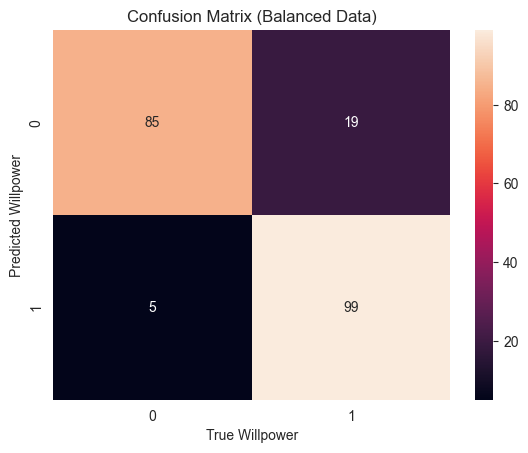

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Select the target human code
y_raw = text_df_filtered['Willpower']

# Make sure X (tfidf_df) and y share the same indices
valid_idx = tfidf_df.index.intersection(y_raw.index)

X = tfidf_df.loc[valid_idx]
y = y_raw.loc[valid_idx]
print(y.value_counts())

# Build a balanced sub-dataset with equal number of sample coded as 0 and 1

class_counts = y.value_counts()
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()
n_minority = class_counts.min()

# Indices for each class
minority_idx = y[y == minority_class].index
majority_idx_sampled = y[y == majority_class].sample(
    n=n_minority,
    random_state=12434  # reproducibility
).index

balanced_idx = minority_idx.union(majority_idx_sampled)

X_bal = X.loc[balanced_idx]
y_bal = y.loc[balanced_idx]

# Shuffle rows
X_bal, y_bal = shuffle(X_bal, y_bal, random_state=14312)

print("\nBalanced class counts:")
print(y_bal.value_counts())

#Using the balanced dataset to train the machine learning logistic regression model

bal_classifier = LogisticRegression(max_iter=1000)
bal_classifier.fit(X_bal, y_bal)

print("\nClasses in classifier:", bal_classifier.classes_)

# Predict on balanced data (for quick check)
predicted_bal = bal_classifier.predict(X_bal)

# Print out the evaluation metrics

print("\nLogistic Regression Accuracy (Balanced Data):",
      metrics.accuracy_score(y_bal, predicted_bal))
print("Logistic Regression Precision (Balanced Data):",
      metrics.precision_score(y_bal, predicted_bal))
print("Logistic Regression Recall (Balanced Data):",
      metrics.recall_score(y_bal, predicted_bal))

print("\nClassification Report (Balanced Data):\n",
      metrics.classification_report(y_bal, predicted_bal))

# Confusion matrix
cm_bal = metrics.confusion_matrix(y_bal, predicted_bal)

sns.heatmap(cm_bal, annot=True, fmt='d')
plt.title('Confusion Matrix (Balanced Data)')
plt.xlabel('True Willpower')
plt.ylabel('Predicted Willpower')
plt.show()


To interpret the linguistic patterns associated with human codings, I extracted the model coefficients corresponding to each TF–IDF feature. Positive coefficients indicate words that increase the likelihood of the response being classified into the positive class (coded as 1), whereas negative coefficients indicate words predictive of the negative class (coded as 0). I ranked the coefficients and reported the top 20 positively weighted features and the top 20 negatively weighted features to highlight the most influential lexical predictors identified by the model.

In [22]:
# Print out the logistic coefficients for the top word list
# For binary classification in sklearn:
# bal_classifier.coef_[0] corresponds to the negative class (0) in bal_classifier.classes_
positive_class = bal_classifier.classes_[1]

coef = bal_classifier.coef_[0]         # shape: (n_features,)
feature_names = X_bal.columns          # TF-IDF feature names

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coef
})
# Sort descending: largest positive coefficients first
coef_df_sorted = coef_df.sort_values(by='coefficient', ascending=False)
# Top words predicting the positive_class and negative_class (Top 20 for each)
top_20_pos = coef_df_sorted.head(20)
top_20_neg = coef_df_sorted.tail(20)

highest_20 = top_20_pos.reset_index(drop=True)
lowest_20 = top_20_neg.reset_index(drop=True)

highest_20.columns = [col + "_pos" for col in highest_20.columns]
lowest_20.columns = [col + "_neg" for col in lowest_20.columns]

coef_compare = pd.concat([highest_20, lowest_20], axis=1)

print("Top 20 positive and negative predictors for Willpower:")
print(coef_compare)

Top 20 positive and negative predictors for Willpower:
   feature_pos  coefficient_pos  feature_neg  coefficient_neg
0        focus         1.024687          use        -0.439765
1    improving         0.989208       myslef        -0.441163
2         dont         0.911352         calm        -0.450773
3       trying         0.691945        eagle        -0.466036
4         said         0.676812      academy        -0.466101
5         done         0.669538        solve        -0.469132
6    realizing         0.640896    finishing        -0.480019
7     question         0.622145         help        -0.484462
8        would         0.606577       harder        -0.485194
9           ok         0.578578      keeping        -0.496969
10       stuck         0.554590    something        -0.504390
11     teacher         0.550984   motivation        -0.513434
12     thought         0.542113          idk        -0.515229
13       never         0.539773      reading        -0.527796
14      worked 

For Performance Self-talk and Effort, the results of logistic regression and the top 20 positive and negative word-predictors are reported below.

<img src="TF-IDF Assignment_files/images/Full_Logistic_Performance.png" alt="Results for Performance Self-talk" width="400">
<img src="TF-IDF Assignment_files/images/top20_Performance.png" alt="Results for Performance Self-talk" width="600">
<img src="TF-IDF Assignment_files/images/Full_Logistic_Effort.png" alt="Results for Effort" width="400">
<img src="TF-IDF Assignment_files/images/top20_Effort.png" alt="Results for Effort" width="600">

To complement the full TF–IDF classification model and to enhance the interpretability of the lexical patterns associated with human-coded motivational strategies, a reduced-feature analysis was conducted. Although the full TF–IDF matrix provides a comprehensive representation of the lexical content in students’ responses, its high dimensionality includes many features that are statistically weighted but conceptually uninformative. In contrast, limiting the model to the strongest positive and negative predictors enables a deeper analysis of the lexical cues most associated with the human-coded motivational strategy.

Following the initial logistic regression model, the complete list of TF–IDF coefficients was examined to identify the most influential positive and negative predictors of the target motivational strategy (coded as 1 vs. 0). This manual review was necessary because the full TF–IDF representation includes many statistically weighted but conceptually uninformative features, such as rare tokens, idiosyncratic word forms, or terms lacking theoretical relevance. A reduced TF–IDF matrix was constructed using only these selected predictors. A logistic regression classifier was then trained on the same balanced dataset using this reduced feature space. Model performance was evaluated using accuracy, precision, recall, and a confusion matrix summarizing prediction errors. Because the model was evaluated on the same balanced dataset on which it was trained, these metrics reflect the classifier’s ability to distinguish between the two human-coded categories based solely on the most influential TF–IDF features.

In [23]:
# Print out more positive and negative predictor words
pos_df = coef_df_sorted[coef_df_sorted['coefficient'] > 0].copy()
neg_df = coef_df_sorted[coef_df_sorted['coefficient'] < 0].copy()

pos_words = pos_df['feature'].tolist()
neg_words = neg_df['feature'].tolist()

print("\nFirst top 50 positive words for Willpower:")
print(pos_words[:50])

print("\nFirst top 50 negative words for Willpower:")
print(neg_words[:50])


First top 50 positive words for Willpower:
['focus', 'improving', 'dont', 'trying', 'said', 'done', 'realizing', 'question', 'would', 'ok', 'stuck', 'teacher', 'thought', 'never', 'worked', 'super', 'told', 'need', 'people', 'se', 'everything', 'cant', 'sooner', 'smarter', 'candy', 'thanks', 'ertyuio', 'solved', 'guessing', 'bobathan', 'idl', 'tried', 'ask', 'give', 'belving', 'jusr', 'learnes', 'knowledge', 'twostep', 'w', 'cooked', 'felt', 'always', 'torcher', 'motivated', 'keept', 'okay', 'bit', 'cause', 'lisin']

First top 50 negative words for Willpower:
['hard', 'best', 'instead', 'used', 'math', 'self', 'mativate', 'someing', 'grinding', 'way', 'go', 'zero', 'nkt', 'better', 'giveing', 'im', 'say', 'th', 'highschool', 'leanr', 'scholerships', 'think', 'motivates', 'skill', 'someone', 'theyre', 'typically', 'waht', 'highlight', 'consider', 'streghths', 'well', 'much', 'number', 'maybe', 'tofay', 'worth', 'hecking', 'hit', 'get', 'l', 'understanding', 'attempting', 'ill', 'tring'


=== Final model for predicting Willpower using top 50 positive + top 50 negative words ===
Total usable features: 100
Accuracy: 0.7692307692307693
Precision: 0.8414634146341463
Recall: 0.6634615384615384

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.88      0.79       104
           1       0.84      0.66      0.74       104

    accuracy                           0.77       208
   macro avg       0.78      0.77      0.77       208
weighted avg       0.78      0.77      0.77       208



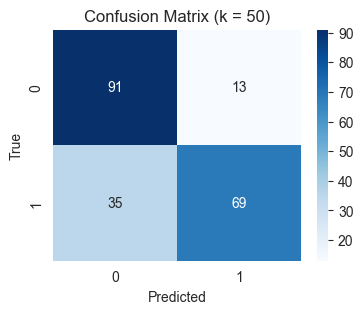

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#Prediction evaluation with top 50 positive and negative words
def evaluate_final_k(X_bal, y_bal, pos_words, neg_words):
    k = 50
    print(f"\n=== Final model for predicting Willpower using top {k} positive + top {k} negative words ===")

    # Select the top 50 pos + 50 neg words
    pos_k = pos_words[:k]
    neg_k = neg_words[:k]
    selected_features = pos_k + neg_k

    # Ensure the selected features exist in TF-IDF columns
    selected_features = [w for w in selected_features if w in X_bal.columns]
    print(f"Total usable features: {len(selected_features)}")

    # Subset TF-IDF matrix
    X_sub = X_bal[selected_features]

    # Train logistic regression on full dataset
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_sub, y_bal)

    # Predict on training data (you can later swap to test set if needed)
    y_pred = clf.predict(X_sub)

    # Evaluation metrics
    print("Accuracy:", metrics.accuracy_score(y_bal, y_pred))
    print("Precision:", metrics.precision_score(y_bal, y_pred))
    print("Recall:", metrics.recall_score(y_bal, y_pred))
    print("\nClassification Report:\n",
          metrics.classification_report(y_bal, y_pred))

    # Confusion matrix
    cm = metrics.confusion_matrix(y_bal, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title("Confusion Matrix (k = 50)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    return clf, selected_features, cm

# Run final model
clf_50, features_50, cm_50 = evaluate_final_k(
    X_bal=X_bal,
    y_bal=y_bal,
    pos_words=pos_words,
    neg_words=neg_words
)

For Performance Self-talk and Effort, the results of logistic regression by using the reduced-feature are reported below.

<img src="TF-IDF Assignment_files/images/top50_performance.png" alt="Results for Performance Self-talk" width="1960">
<img src="TF-IDF Assignment_files/images/reduced_model_Performance.png" alt="Results for Performance Self-talk" width="800">
<img src="TF-IDF Assignment_files/images/top50_effort.png" alt="Results for Effort" width="1960">
<img src="TF-IDF Assignment_files/images/reduced_model_Effort.png" alt="Results for Effort" width="800">

### Discussion
The present study examined whether TF–IDF–based machine-learning models could predict human-coded motivational strategies from students’ open-ended responses. Overall, the results provide partial support for the hypotheses. Consistent with Hypothesis 1, the full TF–IDF models demonstrated strong predictive performance across all three motivational codes. For Willpower, the model achieved an accuracy of 0.88, with high precision (0.89) and recall (0.88). Similarly strong performance was observed for Performance Self-Talk (accuracy = 0.90, precision = 0.91, recall = 0.90) and Effort (accuracy = 0.89, precision = 0.90, recall = 0.89). These findings suggest that students’ qualitative descriptions contain identifiable lexical patterns that align with the conceptual structure of the human-coded motivational categories.

The reduced-feature models also captured meaningful information but showed a consistent decrease in performance relative to the full models. When limited to the top 50 positive and top 50 negative predictors, accuracy dropped from 0.88 to 0.77 for Willpower, from 0.90 to 0.88 for Performance Self-Talk, and from 0.89 to 0.78 for Effort. Reductions were also observed in precision and recall. These results support Hypothesis 2, which predicted that reduced models would retain some predictive utility but perform less accurately than the full TF–IDF models. The decline in recall for the positive classes, particularly for Willpower (from 0.95 to 0.66) and Effort (from 0.98 to 0.66), suggests that the reduced models have difficulty capturing the full lexical variability present in students’ responses.

Finally, the findings provide support for Hypothesis 3, which proposed that TF–IDF–based NLP models would demonstrate above-chance ability to predict human-coded motivational regulation strategies, while the most predictive lexical features would not align cleanly with the conceptual categories used by human coders. Across all three motivational codes, the TF–IDF models achieved accuracies far above chance-level, indicating that students’ open-ended reflections contain reliable linguistic signals associated with human-coded motivational strategies. However, consistent with the second part of the hypothesis, manual inspection of the top positive and negative TF–IDF predictors revealed that many of the highest-weighted terms did not map neatly onto the theoretical definitions guiding the qualitative coding. Several predictive words were either overly general (e.g., “work,” “try,” “thing”), highly context-dependent, or completely irrelevant. This divergence suggests that while the models can learn statistically discriminative features, these features do not necessarily capture the conceptual nuance emphasized in human coding rubrics.

The current study demonstrates the potential of NLP methods as complementary tools for motivational research. Automated models could support qualitative analyses at scale in educational settings, enabling instructors or learning scientists to efficiently monitor changes in students’ motivational strategies over time. In addition, identifying the most predictive lexical features may inform the design of real-time learning analytics dashboards or adaptive feedback systems.

Several additional limitations should be noted. First, this study lacked a robust methodological approach to handle the complexity and noise of qualitative input. Although two procedures were implemented to detect and remove nonsensical or low-quality strings, manual inspection revealed that a small portion of unusable or incoherent responses remained in the final dataset. These noisy inputs may have introduced unpredictable variance into the TF–IDF feature matrix. Second, the dataset itself poses limitations. The original distribution of human-coded categories was highly imbalanced, with the “1” category substantially less frequent than the “0” category across all three motivational strategies. To mitigate the bias this imbalance could introduce, the present study relied on random sampling to obtain a balanced subset for all machine-learning analyses. While this approach improves class balance, it also limits generalizability, as the resulting performance metrics do not reflect how the model would perform under naturally occurring class ratios. Third, the TF–IDF representation introduces conceptual constraints. TF–IDF treats language as isolated tokens and does not capture context, syntax, negation, or the semantic structure of motivational strategy reflections. As a result, some of the most predictive features may reflect superficial lexical regularities rather than psychologically meaningful indicators of motivational regulation. Fourth, the machine-learning procedure used in this study limits the interpretability and external validity of the findings. Because the models were evaluated on the same balanced dataset used for training, the reported accuracy, precision, and recall values likely overestimate actual generalization performance. Without a separate test set or cross-validation framework, the results should be interpreted as demonstrating the model’s sample-specific discriminative ability rather than its predictive robustness in new or unseen data.

Future work can build on this study in several directions. First, addressing the limitations of TF–IDF by adopting contextualized language models such as BERT can substantially improve both accuracy and conceptual alignment. Unlike TF–IDF, which treats words as independent tokens, contextualized models capture semantic relationships, syntactic structure, and pragmatic meaning. This would allow the classifier to detect more nuanced motivational expressions, which are often indistinguishable under a bag-of-words representation. Second, future research should consider dimensionality-reduction approaches to construct more conceptually coherent representations of motivational strategies. Techniques such as principal component analysis (PCA) can reduce feature space sparsity while yielding interpretable latent dimensions. A more compact representation of motivational language would reduce reliance on manual dataset balancing, as the model would operate on aggregated, semantically enriched dimensions rather than sparse individual words. This approach may also help preserve the natural distribution of categories rather than requiring artificial subsampling. Third, future work should implement rigorous model-evaluation procedures, such as cross-validation or separate hold-out test sets. This would provide a more accurate estimate of generalization performance and reduce the risk of overfitting that arises when training and testing occur on the same dataset.

<h3 style="text-align: center;">References</h3>

Gamieldien, Y., Case, J. M., & Katz, A. (2023). Advancing qualitative analysis: An exploration of the potential of generative AI and NLP in thematic coding. SSRN Electronic Journal. https://doi.org/10.2139/ssrn.4487768

Hucka, M. (2018). Nostril: A nonsense string evaluator written in Python. Journal of Open Source Software, 3(25), 596, https://doi.org/10.21105/joss.00596

Miele, B.D., Zepeda, C.D., Kim, S., & Scholer, A.A. (in prep). Students’ Self-Regulation of Their Motivation.

Monette, M., Peroutka, M., Richey, J.E., & Zepeda, C.D. (in press). Beyond Hypotheticals: Re-examining Authentic Motivational Regulation Strategies in Exam Preparation. Journal of Educational Psychology.

Neuhaus, R. & Ruvinskiy, R. (2015). Gibberish-Detector [Source code]. GitHub. https://github.com/rrenaud/Gibberish-Detector

Schwinger, M., Steinmayr, R., & Spinath, B. (2009). How do motivational regulation strategies affect achievement: Mediated by effort management and moderated by intelligence. Learning and Individual Differences, 19(4), 621–627.

Wolters, C. A. (1999). The relation between high school students' motivational regulation and their use of learning strategies, effort, and classroom performance. Learning and Individual Differences, 11(3), 281–299. https://doi.org/10.1016/S1041-6080(99)80004-1

Zimmerman, B. J., & Schunk, D. H. (2012). Motivation: An essential dimension of self-regulated learning. In Motivation and self-regulated learning (pp. 1-30). Routledge.

*Acknowledgement*: This work was assisted by generative AI (ChatGPT) and Grammarly for polishing grammar and refining the language.